In [1]:
import pandas as pd

# Exemplo: carregando de um CSV que você já criou após pré-processamento
df = pd.read_csv("2p_mensagens_preprocessadas.csv")

# Visualizar tamanho, colunas e primeiras linhas
print("Formato do DF (linhas, colunas):", df.shape)
print("Colunas:", df.columns.tolist())

print("\nAmostra de linhas:")
display(df.head(5))  # se estiver usando Jupyter/IPython


/tmp/ipykernel_104469/550147300.py:4: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("2p_mensagens_preprocessadas.csv")


Formato do DF (linhas, colunas): (276748, 35)
Colunas: ['id', 'date_message', 'id_member_anonymous', 'ddi', 'ddd', 'country', 'country_iso3', 'state', 'id_group_anonymous', 'media', 'media_type', 'media_url', 'has_media', 'has_media_url', 'trava_zap', 'text_content_anonymous', 'dataset_info_id', 'latitude', 'longitude', 'date_system', 'score_sentiment', 'score_misinformation', 'id_message', 'id_persona', 'message_type', 'messenger', 'media_name', 'media_md5', 'display_name', 'address_message', 'latitude_message', 'longitude_message', 'contacts_message', 'tokens_preprocessed', 'clean_text']

Amostra de linhas:


,id,date_message,id_member_anonymous,ddi,ddd,country,country_iso3,state,id_group_anonymous,media,...,messenger,media_name,media_md5,display_name,address_message,latitude_message,longitude_message,contacts_message,tokens_preprocessed,clean_text
0,1892572,2022-11-01 00:00:00.000000,b16837dd8b9dfc724bb7687d889ba492,55,81,BRAZIL,BRA,PE,e110071613239754d38878f7e046e95b,NaN,...,whatsapp,NaN,NaN,NaN,NaN,0,0,NaN,"['filha', 'michelle', 'manifesta', 'após', 're...",filha michelle manifesta após resultado urnas ...
1,1892573,2022-11-01 00:00:12.000000,6a8c6eb0b78e68845bce5d047fe592d6,55,81,BRAZIL,BRA,PE,7b76776a794de71a6abf74f41258db3d,NaN,...,whatsapp,NaN,NaN,NaN,NaN,0,0,NaN,"['https', '//youtu.be/8vobjcemrz0']",https //youtu.be/8vobjcemrz0
2,1892577,2022-11-01 00:00:18.000000,8782f8b429c19955446096559732d2b6,55,19,BRAZIL,BRA,SP,3f644cec57181e1b01bf3279d7480ee2,NaN,...,whatsapp,NaN,NaN,NaN,NaN,0,0,NaN,"['q', 'pedir', 'intervenção', 'militar', 'fede...",q pedir intervenção militar federal manutenção...
3,1892578,2022-11-01 00:00:17.000000,8782f8b429c19955446096559732d2b6,55,19,BRAZIL,BRA,SP,3f644cec57181e1b01bf3279d7480ee2,NaN,...,whatsapp,NaN,NaN,NaN,NaN,0,0,NaN,"['pessoal', '``', 'artigo', '142', ""''"", 'diz'...",pessoal `` artigo 142 '' diz presidente ficar ...
4,1892585,2022-11-01 00:00:54.000000,dba6ec4290dad880a0a1faeae0c1386b,55,11,BRAZIL,BRA,SP,403ce8a136d1abc841564d6c365a6add,NaN,...,whatsapp,NaN,NaN,NaN,NaN,0,0,NaN,"['https', '//twitter.com/dcborges2558/status/1...",https //twitter.com/dcborges2558/status/158713...


In [2]:
# Quantidade de grupos únicos
num_grupos = df['id_group_anonymous'].nunique()
print(f"Número total de grupos únicos: {num_grupos}")

# Exemplo: listar alguns IDs de grupos
unique_groups = df['id_group_anonymous'].unique()
print("\nAlguns grupos:")
print(unique_groups[:10])


Número total de grupos únicos: 236

Alguns grupos:
['e110071613239754d38878f7e046e95b' '7b76776a794de71a6abf74f41258db3d'
 '3f644cec57181e1b01bf3279d7480ee2' '403ce8a136d1abc841564d6c365a6add'
 '359af3f05f3e9d4b9ede646dba408a7a' '3261942daa57e8575137153da98cdb21'
 '59324f9be83e4ddff1e1dbf4b53bc803' '27a1e8669c7f60e832efa005b5d5caf8'
 'c14bc759ccabd4bfe70024d7f1cc49e3' '500ae0f56b3a6125ef54638769f361e3']


In [3]:
import re

# Regex para capturar link do WhatsApp
pattern_link = r"(chat\.whatsapp\.com/[A-Za-z0-9]+)"

# Lista (grupo, link) para criar rede bipartida
edges_bip = []

for row in df.itertuples(index=False):
    group_id = getattr(row, 'id_group_anonymous')
    text_msg = getattr(row, 'clean_text')  # ou text_content_anonymous
    
    # Se estiver nulo, pula
    if pd.isnull(text_msg):
        continue
    
    found_links = re.findall(pattern_link, str(text_msg))
    for link in found_links:
        # Cada link encontrado gera uma ocorrência
        # Por padrão, conte 1 para cada aparição
        edges_bip.append((group_id, link))

# Converter para DataFrame
edges_bip_df = pd.DataFrame(edges_bip, columns=['source', 'target'])
print(f"Total de (grupo->link) encontrado: {len(edges_bip_df)}")

# Exibir algumas linhas
display(edges_bip_df.head(10))


Total de (grupo->link) encontrado: 13086


,source,target
0,e110071613239754d38878f7e046e95b,chat.whatsapp.com/iiwo2ljky1fjy2gn9cmdqi
1,165a7c53829ca1c5f3a3f161c25d4e01,chat.whatsapp.com/gab658knmqxgdiof6htgvm
2,cb9049c31a5db299b4a7e19afc7d3f31,chat.whatsapp.com/gab658knmqxgdiof6htgvm
3,73b27ba3cf40b3b452a98ef80ca72b79,chat.whatsapp.com/bp1gooktirv89pu0elu5lt
4,c21c36ac52770f3bbe8702e4ac29196f,chat.whatsapp.com/bp1gooktirv89pu0elu5lt
5,b5a0f1f01df8b5c052337dccdb4c3d70,chat.whatsapp.com/cvlkm8ka402fozwavfv80a
6,b5a0f1f01df8b5c052337dccdb4c3d70,chat.whatsapp.com/goy0gj92ve19fzyoflnwjf
7,b5a0f1f01df8b5c052337dccdb4c3d70,chat.whatsapp.com/bgpn8xibcmplmmu0gxojrp
8,b5a0f1f01df8b5c052337dccdb4c3d70,chat.whatsapp.com/em06jtobktkdu2gygzdg7g
9,b5a0f1f01df8b5c052337dccdb4c3d70,chat.whatsapp.com/ekfzdgyf8bulb1bsixiukx


In [4]:
# Contagem
edges_agg = edges_bip_df.value_counts().reset_index(name='weight')
# Renomear colunas para legibilidade
edges_agg.columns = ['source', 'target', 'weight']

print("Exemplo de arestas (grupo->link) com peso:")
display(edges_agg.head(10))

print(f"Quantidade de pares (grupo->link) distintos: {len(edges_agg)}")


Exemplo de arestas (grupo->link) com peso:


,source,target,weight
0,cf32d27ec4f76670745647dfa7042662,chat.whatsapp.com/gyc7muaqsodi3dsmyivz2m,218
1,165a7c53829ca1c5f3a3f161c25d4e01,chat.whatsapp.com/ckl7orwiyej57xfgcai74e,165
2,cb9049c31a5db299b4a7e19afc7d3f31,chat.whatsapp.com/ckl7orwiyej57xfgcai74e,165
3,165a7c53829ca1c5f3a3f161c25d4e01,chat.whatsapp.com/jjcrk0lijzc6puk4no4h3z,138
4,cb9049c31a5db299b4a7e19afc7d3f31,chat.whatsapp.com/jjcrk0lijzc6puk4no4h3z,135
5,ab6b15851eba775fddb0fac2ab1d32b4,chat.whatsapp.com/gd9e7e1uh5mdfjsunhanat,122
6,cf32d27ec4f76670745647dfa7042662,chat.whatsapp.com/hdfmfdpodnu866mtbbo4rc,97
7,992ad59ad0b193006afe7d52ab194201,chat.whatsapp.com/ihdi1szfgwg0mu3nswo7ef,96
8,64413647daa2460b187cfd1d25f50634,chat.whatsapp.com/j8oidk9xvqm1c6ymvw5qu6,90
9,cf32d27ec4f76670745647dfa7042662,chat.whatsapp.com/clyrxuejetnjtjasdrzwfw,87


Quantidade de pares (grupo->link) distintos: 3214


In [5]:
links_count = edges_agg.groupby('target')['weight'].sum().reset_index()
links_count.columns = ['link', 'total_shares']
links_count.sort_values('total_shares', ascending=False, inplace=True)

print("Top 10 links mais compartilhados:")
display(links_count.head(10))


Top 10 links mais compartilhados:


,link,total_shares
144,chat.whatsapp.com/ckl7orwiyej57xfgcai74e,338
669,chat.whatsapp.com/gyc7muaqsodi3dsmyivz2m,287
993,chat.whatsapp.com/jjcrk0lijzc6puk4no4h3z,283
954,chat.whatsapp.com/j8oidk9xvqm1c6ymvw5qu6,264
871,chat.whatsapp.com/ihdi1szfgwg0mu3nswo7ef,259
219,chat.whatsapp.com/db6w97gwdruamoaxms3o3l,187
436,chat.whatsapp.com/f3g6wwsejln9bzunjxc1ax,173
966,chat.whatsapp.com/jcalsztbxhgiyie0rngmta,171
92,chat.whatsapp.com/bylpoqv2mbelwngtbpeyzg,165
488,chat.whatsapp.com/fjowpni2aif6xc9umys5gf,162


In [6]:
groups_count = edges_agg.groupby('source')['weight'].sum().reset_index()
groups_count.columns = ['id_group_anonymous', 'total_shares']
groups_count.sort_values('total_shares', ascending=False, inplace=True)

print("Top 10 grupos que mais compartilharam links:")
display(groups_count.head(10))


Top 10 grupos que mais compartilharam links:


,id_group_anonymous,total_shares
125,cb9049c31a5db299b4a7e19afc7d3f31,1029
12,165a7c53829ca1c5f3a3f161c25d4e01,1025
20,2395966fd20544eec94ba33546b02ca3,835
150,f6b5c7a052fda70a8276cc14416cc3d3,832
127,cf32d27ec4f76670745647dfa7042662,797
64,64413647daa2460b187cfd1d25f50634,701
118,c21c36ac52770f3bbe8702e4ac29196f,307
71,73b27ba3cf40b3b452a98ef80ca72b79,306
137,e110071613239754d38878f7e046e95b,286
101,ab6b15851eba775fddb0fac2ab1d32b4,265


In [7]:
import re

link_interessante = "chat.whatsapp.com/hpqfb8m0ds840h4utwyvs6"  # insira um link real da sua tabela

# Regex para buscar esse link exato no texto
pattern_specific_link = re.compile(re.escape(link_interessante))

df_link = []
for row in df.itertuples(index=False):
    text_msg = getattr(row, 'clean_text')
    if pd.isnull(text_msg):
        continue
    if pattern_specific_link.search(str(text_msg)):
        df_link.append(row)

df_link = pd.DataFrame(df_link)
print(f"Total de mensagens que contêm '{link_interessante}': {len(df_link)}")

# Exibir algumas colunas relevantes
if not df_link.empty:
    # Converter date_message para datetime, se não tiver feito ainda
    df_link['date_message'] = pd.to_datetime(df_link['date_message'], errors='coerce')
    
    # Ordenar por data
    df_link.sort_values('date_message', inplace=True)
    
    display(df_link[['date_message', 'id_group_anonymous', 'clean_text']].head(10))


Total de mensagens que contêm 'chat.whatsapp.com/hpqfb8m0ds840h4utwyvs6': 16


,date_message,id_group_anonymous,clean_text
0,2022-12-13 14:46:14,e110071613239754d38878f7e046e95b,anitta doente internada novamente pulmão estôm...
1,2022-12-13 14:47:39,ee85f63c945ffa50ba8bb57acf2c1bf9,anitta doente internada novamente pulmão estôm...
2,2022-12-16 03:09:15,e110071613239754d38878f7e046e95b,ative som canto superior direito up-right_arro...
3,2022-12-22 02:30:06,ee85f63c945ffa50ba8bb57acf2c1bf9,boa noite todos todas logo logo grupo voltará ...
4,2022-12-22 02:30:14,e110071613239754d38878f7e046e95b,boa noite todos todas logo logo grupo voltará ...
5,2022-12-22 02:33:46,ee85f63c945ffa50ba8bb57acf2c1bf9,boa noite todos todas logo logo grupo voltará ...
6,2022-12-22 02:33:57,e110071613239754d38878f7e046e95b,boa noite todos todas logo logo grupo voltará ...
7,2022-12-22 21:28:35,ee85f63c945ffa50ba8bb57acf2c1bf9,restaurante explode collision :face_screaming_...
8,2022-12-22 21:28:48,e110071613239754d38878f7e046e95b,restaurante explode collision :face_screaming_...
9,2022-12-22 21:37:30,addb88a34374d43aa9ecd4df7359ce39,restaurante explode collision :face_screaming_...


In [8]:
if not df_link.empty:
    df_link['date_only'] = df_link['date_message'].dt.date
    shares_per_day = df_link.groupby('date_only').size().reset_index(name='count')
    print("Contagem por dia para o link escolhido:")
    display(shares_per_day.head(15))


Contagem por dia para o link escolhido:


,date_only,count
0,2022-12-13,2
1,2022-12-16,1
2,2022-12-22,11
3,2022-12-23,2


In [9]:
import networkx as nx
from networkx.algorithms import bipartite

B = nx.from_pandas_edgelist(edges_agg, 'source', 'target', edge_attr='weight', create_using=nx.Graph())
groups = set(edges_agg['source'].unique())  # conjunto de nós do tipo grupo
G_groups_weighted = bipartite.weighted_projected_graph(B, groups)


### Mensagens repetidas

In [10]:
# 1. Agrupar por texto (clean_text) e ver quantas linhas tem cada texto
text_count = df.groupby('clean_text').size().reset_index(name='num_occurrences')
text_count.sort_values('num_occurrences', ascending=False, inplace=True)

print("Top 10 mensagens mais repetidas (iguais) em todo o dataset:")
print(text_count.head(10))

Top 10 mensagens mais repetidas (iguais) em todo o dataset:
                                               clean_text  num_occurrences
51728   fire 𝐒𝐎𝐋𝐃𝐀𝐃𝐎-𝐃𝐄-𝐋𝐔𝐙-𝟐.𝟎 fire http //davizinxra...              625
171444  vai passando rola lula compartilhe chegar cu b...              435
182800  كاتي ابليس يببني الروش حاكم المماليك  9999999...              380
160154  shopping_cart ℛ͚ tzuann ezgz mage ࣰࣰࣲࣲᐝ͜͡ℛ͚²⁷³...              317
71200   https //open.spotify.com/track/3zkwh2ezwtbll36...              266
96846                        https //youtu.be/a4ijtahivbi              199
173187  vamos seguir instagram exército brasileiro bom...              193
153488  real madrid pode esperar hora vai chegar real ...              141
156971  ruas podemos protestar pode sair protestar rua...              138
14743   atenção faça chegar brasília-df vários ônibus ...              126


In [11]:
text_groups = df.groupby('clean_text')['id_group_anonymous'].nunique().reset_index(name='num_groups')
text_groups.sort_values('num_groups', ascending=False, inplace=True)

print("Top 10 mensagens que aparecem em mais grupos diferentes:")
print(text_groups.head(10))


Top 10 mensagens que aparecem em mais grupos diferentes:
                                               clean_text  num_groups
96846                        https //youtu.be/a4ijtahivbi          74
173187  vamos seguir instagram exército brasileiro bom...          70
156971  ruas podemos protestar pode sair protestar rua...          62
14743   atenção faça chegar brasília-df vários ônibus ...          59
67053   https //instagram.com/exercito_oficial igshid=...          56
99109                        https //youtu.be/gcg6_9_yhjk          55
129845  notícia dentro quartel militares querem pronti...          55
21736   bom dia advogada vou dar conselho caso polícia...          51
58857   hoje record derruba máscara globo vamos assist...          50
21651                                             bom dia          48


In [12]:
df_text_stats = pd.merge(text_count, text_groups, on='clean_text')
df_text_stats.sort_values(by='num_groups', ascending=False, inplace=True)

df_text_stats.head(20)


,clean_text,num_occurrences,num_groups
5,https //youtu.be/a4ijtahivbi,199,74
6,vamos seguir instagram exército brasileiro bom...,193,70
8,ruas podemos protestar pode sair protestar rua...,138,62
9,atenção faça chegar brasília-df vários ônibus ...,126,59
14,https //instagram.com/exercito_oficial igshid=...,105,56
19,https //youtu.be/gcg6_9_yhjk,99,55
11,notícia dentro quartel militares querem pronti...,112,55
22,bom dia advogada vou dar conselho caso polícia...,94,51
20,hoje record derruba máscara globo vamos assist...,97,50
10,atenção repassem outros grupos números celular...,114,48


In [13]:
mensagens_difundidas = df_text_stats[df_text_stats['num_groups'] >= 3]
print(f"Total de mensagens que aparecem em >=3 grupos: {len(mensagens_difundidas)}")


Total de mensagens que aparecem em >=3 grupos: 10646


In [14]:
texto_alvo = "https //youtu.be/qbtzhb0akt8	"

df_mensagem = df[df['clean_text'] == texto_alvo].copy()
print("Total de ocorrências:", len(df_mensagem))

# Ver grupos, datas etc.
df_mensagem['date_message'] = pd.to_datetime(df_mensagem['date_message'])
df_mensagem.sort_values('date_message', inplace=True)

print(df_mensagem[['id_group_anonymous', 'date_message', 'clean_text']])


Total de ocorrências: 0
Empty DataFrame
Columns: [id_group_anonymous, date_message, clean_text]
Index: []


In [15]:
# 1) Agrupar (grupo, texto)
df_msg_bip = df[['id_group_anonymous','clean_text']].dropna().copy()
df_msg_bip['weight'] = 1

# 2) Agregar
df_msg_bip_agg = df_msg_bip.groupby(['id_group_anonymous','clean_text'])['weight'].sum().reset_index()

# 3) Rede bipartida
import networkx as nx
B_msg = nx.from_pandas_edgelist(df_msg_bip_agg, source='id_group_anonymous', target='clean_text', edge_attr='weight', create_using=nx.Graph())

# 4) Conjunto de grupos
groups = set(df['id_group_anonymous'].unique())

# 5) Projeção grupo×grupo com o weighted_projected_graph
G_msg_groups = nx.bipartite.weighted_projected_graph(B_msg, groups)

print(f"Nodes (groups): {G_msg_groups.number_of_nodes()}, Edges: {G_msg_groups.number_of_edges()}")


Nodes (groups): 236, Edges: 10105


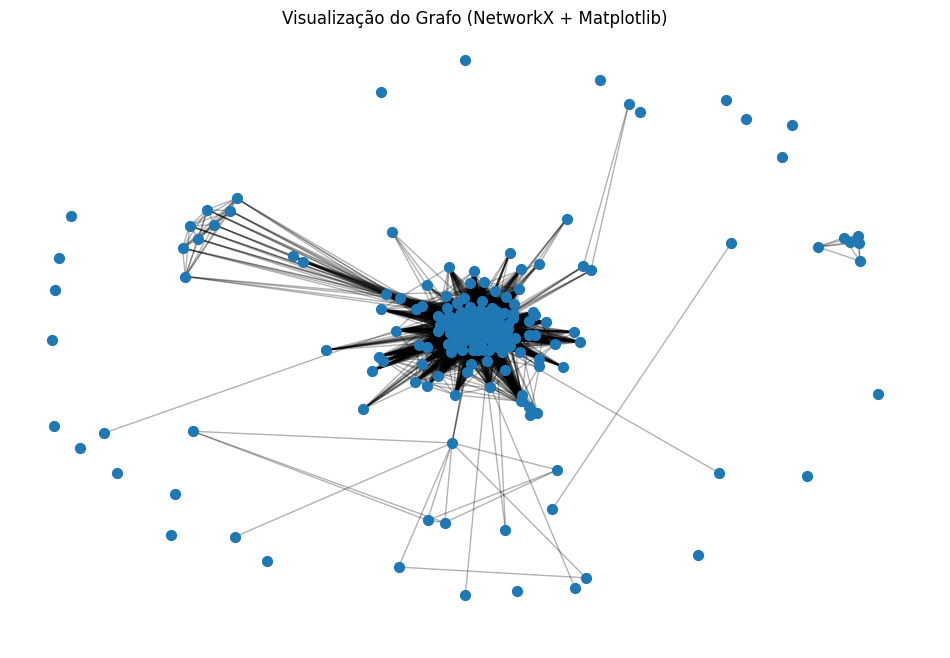

In [16]:
import networkx as nx
import matplotlib.pyplot as plt

# Exemplo: supondo que seu grafo esteja em G, criado pelo NetworkX
# e que seja um grafo não-dirigido (Graph) ou dirigido (DiGraph).
# Aqui vou supor um grafo não-dirigido.

# 1. Escolher um layout (spring_layout, kamada_kawai_layout, etc.)
pos = nx.spring_layout(G_msg_groups, k=0.5, iterations=50) 
# 'k' é um fator de repulsão; se o grafo for grande, teste valores menores/maiores

# 2. Criar a figura
plt.figure(figsize=(12, 8))  # Ajuste o tamanho

# 3. Desenhar nós
nx.draw_networkx_nodes(G_msg_groups, pos, node_size=50)  # Aumente ou diminua se quiser

# 4. Desenhar arestas
nx.draw_networkx_edges(G_msg_groups, pos, alpha=0.3)     # alpha=0.3 para deixar linhas translúcidas

# (Opcional) Desenhar rótulos (para poucos nós, pois pode ficar poluído)
# nx.draw_networkx_labels(G, pos, font_size=7)

plt.title("Visualização do Grafo (NetworkX + Matplotlib)")
plt.axis("off")  # remove eixos
plt.show()


In [17]:
from pyvis.network import Network
import networkx as nx

# Se já tiver seu grafo G (pode ser DiGraph ou Graph)
net = Network(notebook=True, 
              height="750px", 
              width="100%", 
              bgcolor="#ffffff", 
              font_color="#000000")

# Adicionar nós e arestas do seu grafo
for node in G_msg_groups.nodes():
    net.add_node(str(node), label=str(node))
    
# Se tiver pesos, você pode usar 'value' para controlar espessura ou outro atributo
for u, v, data in G_msg_groups.edges(data=True):
    w = data.get('weight', 1)  # se houver weight
    net.add_edge(str(u), str(v), value=w)

# Opcional: mostrar botões de configuração de layout
# net.show_buttons(filter_=['physics'])

net.show("meu_grafo.html")


meu_grafo.html


In [18]:
threshold_degree = 3  # Exemplo: queremos manter nós com grau >= 3

# Criar uma lista de nós que atendem ao critério
filtered_nodes = [n for n, d in G_msg_groups.degree() if d >= threshold_degree]

# Criar um subgrafo contendo apenas esses nós
H = G_msg_groups.subgraph(filtered_nodes).copy()

print(f"G tinha {G_msg_groups.number_of_nodes()} nós e {G_msg_groups.number_of_edges()} arestas.")
print(f"H (subgrafo filtrado) tem {H.number_of_nodes()} nós e {H.number_of_edges()} arestas.")


G tinha 236 nós e 10105 arestas.
H (subgrafo filtrado) tem 203 nós e 10092 arestas.


In [19]:
threshold_weight = 5

# Vamos criar uma cópia do grafo para manipular arestas
H2 = G_msg_groups.copy()

# Verificar cada aresta e remover se não atingir o critério
for u, v, data in list(H2.edges(data=True)):
    w = data.get('weight', 1)  # se não tiver 'weight', assume 1
    if w < threshold_weight:
        H2.remove_edge(u, v)

print(f"Apos filtrar por peso, H2 tem {H2.number_of_nodes()} nós e {H2.number_of_edges()} arestas.")


Apos filtrar por peso, H2 tem 236 nós e 5716 arestas.


In [20]:
# Passo 1: filtrar arestas com peso >= 5
H_temp = G_msg_groups.copy()
for u, v, data in list(H_temp.edges(data=True)):
    if data.get('weight', 1) < 5:
        H_temp.remove_edge(u, v)

# Passo 2: filtrar nós com grau >= 3
filtered_nodes = [n for n, d in H_temp.degree() if d >= 3]
H_final = H_temp.subgraph(filtered_nodes).copy()

print(H_final.number_of_nodes(), "nós, ", H_final.number_of_edges(), "arestas.")


166 nós,  5697 arestas.


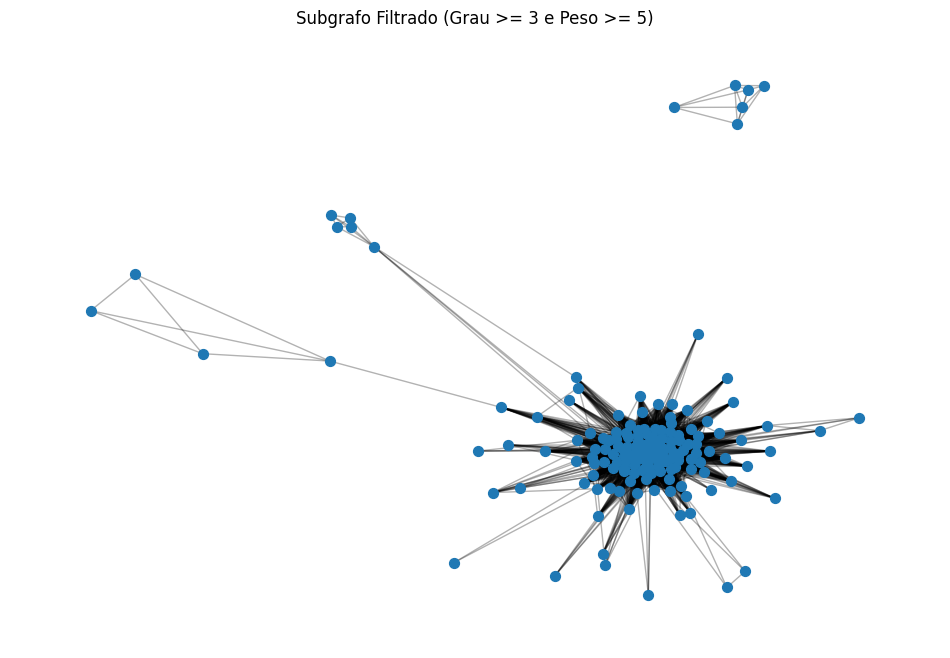

In [21]:
import matplotlib.pyplot as plt

pos = nx.spring_layout(H_final, k=0.5, iterations=50)

plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(H_final, pos, node_size=50)
nx.draw_networkx_edges(H_final, pos, alpha=0.3)

# Se quiser rótulos de nós (cuidado com poluição visual)
# nx.draw_networkx_labels(H_final, pos, font_size=7)

plt.title("Subgrafo Filtrado (Grau >= 3 e Peso >= 5)")
plt.axis("off")
plt.show()


In [22]:
from pyvis.network import Network

net = Network(notebook=True, height="700px", width="100%", bgcolor="#ffffff", font_color="#000000")

for node in H_final.nodes():
    net.add_node(str(node), label=str(node))  # Converte para string para evitar problemas

for u, v, data in H_final.edges(data=True):
    w = data.get('weight', 1)
    net.add_edge(str(u), str(v), value=w, title=str(w))  # 'title' aparece em hover

net.show("subgrafo_filtrado.html")


subgrafo_filtrado.html


#### Nucleo periferia

In [23]:
import networkx as nx

# Supondo que você já tenha seu grafo não dirigido G (por ex. G_groups_weighted)
kcore_dict = nx.core_number(G_groups_weighted)

# Descobrir o valor máximo de k-core
max_core = max(kcore_dict.values())

# Definir 'core' como nós com k-core = max_core
core_nodes = [n for n, c in kcore_dict.items() if c == max_core]

# Definir 'periphery' como nós com k-core < max_core
periphery_nodes = [n for n, c in kcore_dict.items() if c < max_core]

print("Core (shell mais profundo):", core_nodes)
print("Periphery (shells menores):", periphery_nodes)


Core (shell mais profundo): ['54765fb281eb1fbb3314c9b081b16845', '69fd5356696dd45ecda066a1e3395cae', '30868723352a2d1cd32c4ae13d189bf2', '04cd2bacf2ef6d56d4e8c0272752bbc0', '403e30f1babfac9239be026c9c6f7aa0', 'd01bfa0f0d31fa1307e7aeb9d3c3870e', 'c014e1c0fb75f0e00ac6680c028b2848', '39b271ec422f6c11db3159df72078c6c', 'b5a0f1f01df8b5c052337dccdb4c3d70', '992ad59ad0b193006afe7d52ab194201', 'aa0703b0ccc34be2545ea7ed8c6e7010', '1ae43beb5ef8fadbe7cf31e87faec00c', 'f6b5c7a052fda70a8276cc14416cc3d3', 'eba9fcd58dab726fb54ff0aadd73e261', 'b67ca9b72ff2ac2dfa866aaa495a105b', '3aeb0bf6eae749a13dd6c8b020ed9a66', '6fb204781074ea35ab1e957ba150c56f', '01b05f8760dea7589789b331479ef99d', '64413647daa2460b187cfd1d25f50634', '2395966fd20544eec94ba33546b02ca3', 'd779a41dcb77a3b96176a2f6ceba4595', '1df34d656c5fb44ec15a7736d5bbbfdb', 'c2d42c96f79ec8119b64777a5ddbb3a0', '258c2f6b782342fa46e7e1c2052ae214', '3eb80f3553f244bc7b767fb728a46281', 'edcdeceade32db7761bbb5269965c06f', '9e11569bdbfe0b1fe6a3f4a42e1b044b',

In [24]:
H_core = G_groups_weighted.subgraph(core_nodes).copy()
print("Nó(s) no núcleo:", len(H_core.nodes()))
print("Arestas no núcleo:", len(H_core.edges()))


Nó(s) no núcleo: 45
Arestas no núcleo: 878


#### Calcular centralidade

In [25]:

# Vamos supor que você já tenha o grafo em 'G'.
# G pode ser não-dirigido ou dirigido. 
# Se for dirigido, troque algumas funções para as versões digraph: 
# ex.: nx.degree_centrality -> nx.in_degree_centrality ou nx.out_degree_centrality.

# 1. Degree Centrality (não-ponderada por padrão)
degree_cent = nx.degree_centrality(G_groups_weighted)

# 2. Betweenness Centrality (pode usar peso, se existir atributo 'weight')
betweenness_cent = nx.betweenness_centrality(G_groups_weighted, weight='weight', normalized=True)

# 3. Closeness Centrality (também aceita peso, mas é interpretado como "distância")
closeness_cent = nx.closeness_centrality(G_groups_weighted, distance='weight')  # se "weight" representa distância

# 4. Katz Centrality (alpha deve ser < 1/lambda_max do grafo)
# Se for um grafo grande, cuidado que Katz pode ser sensível a alpha.
try:
    katz_cent = nx.katz_centrality(G_groups_weighted, alpha=1e-4, beta=1.0, max_iter=10000, weight='weight')
except nx.PowerIterationFailedConvergence as e:
    print("Katz centrality não convergiu. Ajuste alpha ou max_iter.")

# 5. PageRank (só para grafos dirigidos, mas pode usar num grafo não-dirigido transformado em digrafo)
# Se G for não-dirigido, use G.to_directed() ou crie um DiGraph. 
# Aqui vou supor que G seja dirigido:
# page_rank = nx.pagerank(G, alpha=0.85, weight='weight')

# Observação: se G for não-dirigido, é comum usar eigenvector_centrality:
eigen_cent = nx.eigenvector_centrality(G_groups_weighted, max_iter=10000, weight='weight')


In [26]:
import pandas as pd

# Crie listas ou dicionários para unificar
data = {
    'node': [],
    'degree': [],
    'betweenness': [],
    'closeness': [],
    'katz': [],
    'eigen': []
}

for n in G_groups_weighted.nodes():
    data['node'].append(n)
    data['degree'].append(degree_cent.get(n, 0))
    data['betweenness'].append(betweenness_cent.get(n, 0))
    data['closeness'].append(closeness_cent.get(n, 0))
    data['katz'].append(katz_cent.get(n, 0) if 'katz_cent' in locals() else 0)
    data['eigen'].append(eigen_cent.get(n, 0))

df_centrality = pd.DataFrame(data)
df_centrality.sort_values('degree', ascending=False, inplace=True)

print("\nTop 10 nós com maior degree centrality:")
print(df_centrality.head(10))



Top 10 nós com maior degree centrality:
                                 node    degree  betweenness  closeness  \
49   64413647daa2460b187cfd1d25f50634  0.603896     0.015441   0.358520   
59   1df34d656c5fb44ec15a7736d5bbbfdb  0.577922     0.010673   0.352295   
94   ab6b15851eba775fddb0fac2ab1d32b4  0.577922     0.012330   0.337080   
118  59324f9be83e4ddff1e1dbf4b53bc803  0.538961     0.006180   0.345106   
76   3eb80f3553f244bc7b767fb728a46281  0.512987     0.014688   0.347469   
55   d779a41dcb77a3b96176a2f6ceba4595  0.506494     0.008853   0.341620   
38   f6b5c7a052fda70a8276cc14416cc3d3  0.480519     0.007697   0.338203   
54   2395966fd20544eec94ba33546b02ca3  0.480519     0.007697   0.338203   
47   6fb204781074ea35ab1e957ba150c56f  0.480519     0.006260   0.342774   
119  e222f8ccb5095d6d1e1d71723c719bb7  0.474026     0.012062   0.351076   

         katz     eigen  
49   0.084841  0.283156  
59   0.084035  0.247533  
94   0.084207  0.274010  
118  0.083438  0.258429  
76 

In [27]:
df_centrality.to_csv("centralities.csv", index=False)


#### Comunidades

In [28]:
import networkx as nx
import community as community_louvain  # biblioteca "python-louvain"

# Suponha que você tenha um grafo não-dirigido G
# (Se for dirigido, considere convertê-lo com G.to_undirected() ou outro método.)

# 1) Executar Louvain para encontrar uma partição em comunidades
partition = community_louvain.best_partition(G_groups_weighted)

# 'partition' é um dicionário: {nó: id_da_comunidade}, com id_da_comunidade inteiro

# 2) Obter o número de comunidades
com_ids = set(partition.values())
print(f"Encontradas {len(com_ids)} comunidades")

# 3) Agrupar nós por comunidade
from collections import defaultdict
comunidades = defaultdict(list)
for node, com_id in partition.items():
    comunidades[com_id].append(node)

# Exibir tamanho de cada comunidade
for cid, nodes in comunidades.items():
    print(f"Comunidade {cid} tem {len(nodes)} nós")

# 4) (Opcional) Calcular modularidade global
mod_value = community_louvain.modularity(partition, G_groups_weighted)
print("Modularidade:", mod_value)


Encontradas 29 comunidades
Comunidade 0 tem 7 nós
Comunidade 1 tem 54 nós
Comunidade 13 tem 44 nós
Comunidade 3 tem 1 nós
Comunidade 10 tem 8 nós
Comunidade 5 tem 6 nós
Comunidade 6 tem 1 nós
Comunidade 7 tem 3 nós
Comunidade 8 tem 2 nós
Comunidade 9 tem 7 nós
Comunidade 11 tem 1 nós
Comunidade 12 tem 1 nós
Comunidade 14 tem 1 nós
Comunidade 15 tem 1 nós
Comunidade 16 tem 1 nós
Comunidade 17 tem 3 nós
Comunidade 18 tem 1 nós
Comunidade 19 tem 1 nós
Comunidade 20 tem 1 nós
Comunidade 21 tem 1 nós
Comunidade 22 tem 1 nós
Comunidade 23 tem 2 nós
Comunidade 24 tem 1 nós
Comunidade 25 tem 1 nós
Comunidade 26 tem 1 nós
Comunidade 27 tem 1 nós
Comunidade 28 tem 1 nós
Comunidade 2 tem 1 nós
Comunidade 4 tem 1 nós
Modularidade: 0.29220638151081596


In [29]:
from pyvis.network import Network

net = Network(notebook=True)
for node in G_groups_weighted.nodes():
    com_id = partition[node]
    net.add_node(str(node), 
                 label=str(node), 
                 color=f"hsl({(com_id*50)%360},80%,70%)")  # color via comunidade

for u, v, data in G_groups_weighted.edges(data=True):
    net.add_edge(str(u), str(v))
net.show("communities.html")


communities.html


#### Analise temporal

In [30]:
import pandas as pd
import numpy as np
import datetime

# 1) Ler o CSV pré-processado
df = pd.read_csv("2p_mensagens_preprocessadas.csv")

# 2) Converter a coluna de data para datetime (se ainda não estiver)
df['date_message'] = pd.to_datetime(df['date_message'], errors='coerce')

# 3) Definir uma coluna de período
# Exemplo: Agrupar por mês (AAAAMM)
df['year_month'] = df['date_message'].dt.to_period('M')

# Ver quantos períodos temos
print(df['year_month'].value_counts())


/tmp/ipykernel_104469/2070665484.py:6: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("2p_mensagens_preprocessadas.csv")


year_month
2022-11    91589
2023-01    73080
2022-12    71603
2023-02    40476
Freq: M, Name: count, dtype: int64


In [31]:
import re

pattern_link = r"(chat\.whatsapp\.com/[A-Za-z0-9]+)"

# Vamos criar um dicionário: period -> DataFrame de edges bipartidos
edges_bip_by_period = {}

for period_value, group_df in df.groupby('year_month'):
    # Filtrar as mensagens desse período
    # group_df é o subconjunto de df só desse mês
    edges_list = []
    
    for row in group_df.itertuples(index=False):
        group_id = getattr(row, 'id_group_anonymous')
        text_msg = getattr(row, 'clean_text')
        if pd.isnull(text_msg):
            continue
        found_links = re.findall(pattern_link, str(text_msg))
        for link in found_links:
            edges_list.append((group_id, link))
    
    # Agrupar e contar
    edges_bip_df = pd.DataFrame(edges_list, columns=['source', 'target'])
    if not edges_bip_df.empty:
        edges_agg = edges_bip_df.value_counts().reset_index(name='weight')
        edges_agg.columns = ['source', 'target', 'weight']
    else:
        edges_agg = pd.DataFrame(columns=['source', 'target', 'weight'])
    
    edges_bip_by_period[str(period_value)] = edges_agg

print(f"Períodos encontrados: {list(edges_bip_by_period.keys())}")


Períodos encontrados: ['2022-11', '2022-12', '2023-01', '2023-02']


In [32]:
import networkx as nx
from networkx.algorithms import bipartite
import community as community_louvain

results_by_period = {}

for period_value, edges_agg in edges_bip_by_period.items():
    # Criar o grafo bipartido, se estiver vazio pula
    if edges_agg.empty:
        results_by_period[period_value] = None
        continue
    
    B = nx.from_pandas_edgelist(
        edges_agg,
        source='source',
        target='target',
        edge_attr='weight',
        create_using=nx.Graph()
    )
    
    # Identificar quais nós são grupos (aqueles que apareceram em 'source')
    groups = set(edges_agg['source'].unique())
    
    # 1) Projetar em grupo×grupo
    G_proj = bipartite.weighted_projected_graph(B, groups)
    
    # 2) Exemplo: Rodar Louvain para detectar comunidades
    partition = community_louvain.best_partition(G_proj, weight='weight')
    
    # 3) Calcular modularidade
    mod_value = community_louvain.modularity(partition, G_proj, weight='weight')
    
    # 4) Exemplo: Calcular core_number (k-core) só para ver “núcleo”
    kcore_dict = nx.core_number(G_proj)
    
    # Guardar resultados em dicionário
    results_by_period[period_value] = {
        'graph': G_proj,  # grafo do período
        'partition': partition,
        'modularity': mod_value,
        'kcore': kcore_dict
    }

print("Análises concluídas por período!")


Análises concluídas por período!


In [34]:
results_list = []

for period_value, res in results_by_period.items():
    if res is None:
        continue
    partition = res['partition']
    kcore_dict = res['kcore']
    
    for group_id, com_id in partition.items():
        core_val = kcore_dict.get(group_id, 0)
        results_list.append({
            'period': period_value,
            'group': group_id,
            'community': com_id,
            'kcore': core_val
        })

df_results = pd.DataFrame(results_list)
print(df_results.head(10))

print(df_results.head(20))

# Salvar em CSV
df_results.to_csv("temporal_analysis_results.csv", index=False, encoding="utf-8")


    period                             group  community  kcore
0  2022-11  927d87ca6ca2d7f6ee61f6fe1f237f38         10     11
1  2022-11  75ac468d11adb71ecdcb5c0ac7d78134          1      4
2  2022-11  87903ca3e8119dbb1f7b0b3d57d6cf32          2      0
3  2022-11  a9df3d2e2d0016a19037762277e2edfd          3      3
4  2022-11  69fd5356696dd45ecda066a1e3395cae         11     13
5  2022-11  30868723352a2d1cd32c4ae13d189bf2         10     12
6  2022-11  153925f6283d2bbe1320075ace2329f4          5      4
7  2022-11  c1bff9b4ec0407581228087444ff08a2         11     16
8  2022-11  b1e6dbe9c85543a6705d8ab3e49cf9bf          6      0
9  2022-11  fb5643caf27868ffc7a3e9397e674993          5      4
     period                             group  community  kcore
0   2022-11  927d87ca6ca2d7f6ee61f6fe1f237f38         10     11
1   2022-11  75ac468d11adb71ecdcb5c0ac7d78134          1      4
2   2022-11  87903ca3e8119dbb1f7b0b3d57d6cf32          2      0
3   2022-11  a9df3d2e2d0016a19037762277e2edfd      

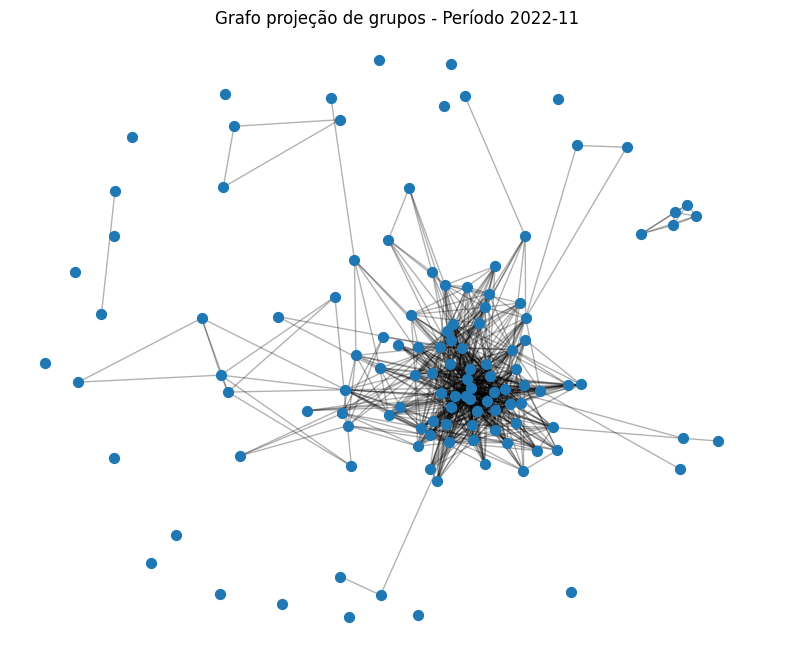

In [42]:
import matplotlib.pyplot as plt

period_chosen = '2022-11'  # exemplo
res = results_by_period[period_chosen]

if res is not None:
    G_chosen = res['graph']
    partition = res['partition']
    
    # Converter partição em cor ou algo assim
    pos = nx.spring_layout(G_chosen, k=0.5)
    
    plt.figure(figsize=(10,8))
    
    communities = set(partition.values())
    for com in communities:
        # pegar nós desta comunidade
        nodes_com = [n for n in G_chosen.nodes() if partition[n] == com]
        nx.draw_networkx_nodes(G_chosen, pos, nodelist=nodes_com, node_size=50)
    
    nx.draw_networkx_edges(G_chosen, pos, alpha=0.3)
    plt.title(f"Grafo projeção de grupos - Período {period_chosen}")
    plt.axis("off")
    plt.show()


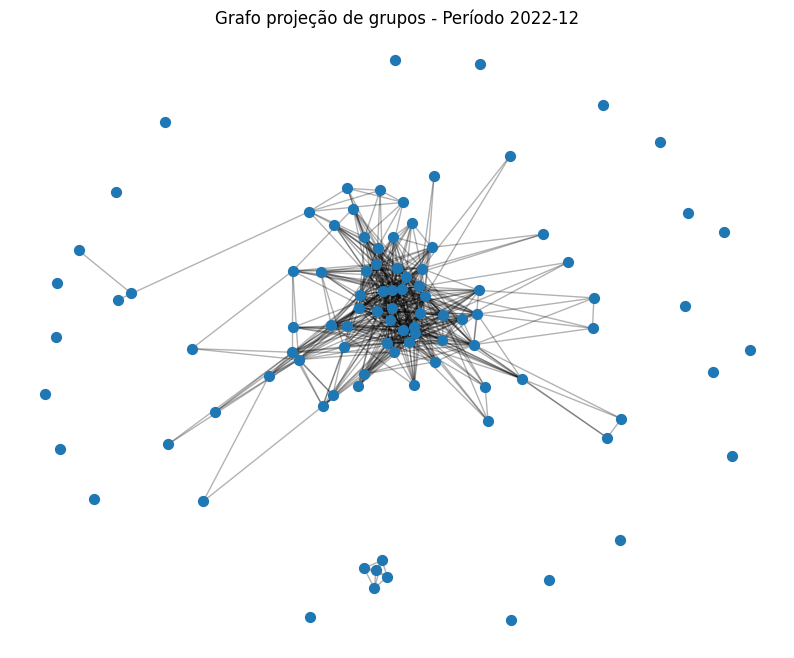

In [43]:
import matplotlib.pyplot as plt

period_chosen = '2022-12'  # exemplo
res = results_by_period[period_chosen]

if res is not None:
    G_chosen = res['graph']
    partition = res['partition']
    
    # Converter partição em cor ou algo assim
    pos = nx.spring_layout(G_chosen, k=0.5)
    
    plt.figure(figsize=(10,8))
    
    communities = set(partition.values())
    for com in communities:
        # pegar nós desta comunidade
        nodes_com = [n for n in G_chosen.nodes() if partition[n] == com]
        nx.draw_networkx_nodes(G_chosen, pos, nodelist=nodes_com, node_size=50)
    
    nx.draw_networkx_edges(G_chosen, pos, alpha=0.3)
    plt.title(f"Grafo projeção de grupos - Período {period_chosen}")
    plt.axis("off")
    plt.show()


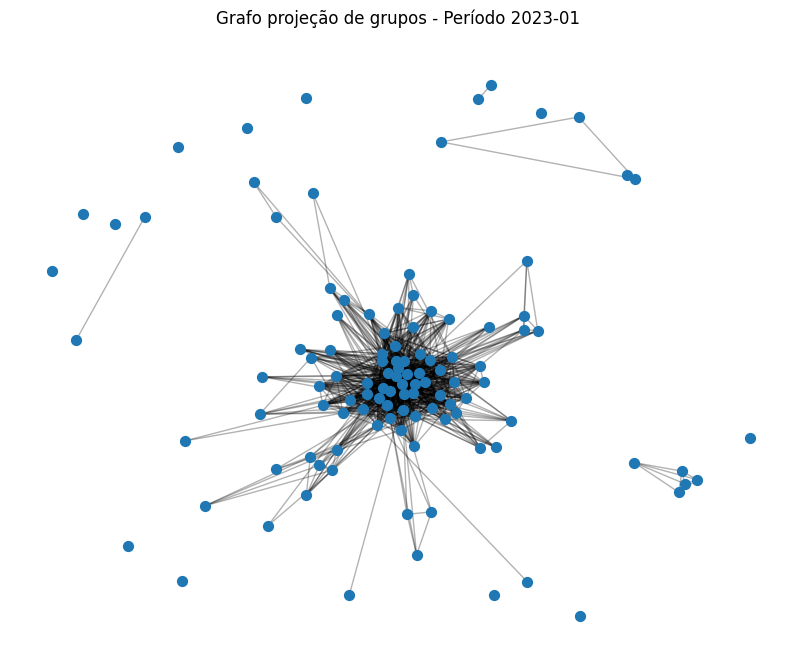

In [44]:
import matplotlib.pyplot as plt

period_chosen = '2023-01'  # exemplo
res = results_by_period[period_chosen]

if res is not None:
    G_chosen = res['graph']
    partition = res['partition']
    
    # Converter partição em cor ou algo assim
    pos = nx.spring_layout(G_chosen, k=0.5)
    
    plt.figure(figsize=(10,8))
    
    communities = set(partition.values())
    for com in communities:
        # pegar nós desta comunidade
        nodes_com = [n for n in G_chosen.nodes() if partition[n] == com]
        nx.draw_networkx_nodes(G_chosen, pos, nodelist=nodes_com, node_size=50)
    
    nx.draw_networkx_edges(G_chosen, pos, alpha=0.3)
    plt.title(f"Grafo projeção de grupos - Período {period_chosen}")
    plt.axis("off")
    plt.show()


In [45]:

results_list = []

for period_value, res in results_by_period.items():
    if res is None:
        continue
    
    partition = res['partition']            # dict {node: comunidade}
    kcore_dict = res['kcore']              # dict {node: core_number}
    mod_value = res['modularity']          # float
    
    for group_id, com_id in partition.items():
        results_list.append({
            'period': period_value,
            'group': group_id,
            'community_id': com_id,        # id inteiro da comunidade
            'kcore': kcore_dict.get(group_id, 0),
            'modularity': mod_value
        })

df_results = pd.DataFrame(results_list)
df_results.sort_values(by=['period', 'community_id'], inplace=True)

print(df_results.head(20))

# Salvar em CSV
df_results.to_csv("temporal_analysis_results.csv", index=False, encoding="utf-8")


      period                             group  community_id  kcore  \
114  2022-11  12f61575080893f9c833b31b370e80e0             0      0   
1    2022-11  75ac468d11adb71ecdcb5c0ac7d78134             1      4   
60   2022-11  4450dfcd32cb7582037943ca7c682e2d             1      5   
92   2022-11  e222f8ccb5095d6d1e1d71723c719bb7             1      5   
108  2022-11  3b75f897e41fca595457f2ad9e101260             1     16   
115  2022-11  7c334930aac5147dc2ca7dd05b5f8b5e             1     11   
2    2022-11  87903ca3e8119dbb1f7b0b3d57d6cf32             2      0   
3    2022-11  a9df3d2e2d0016a19037762277e2edfd             3      3   
32   2022-11  97b022938cba1435286578d705dfc14f             3      3   
45   2022-11  02279b9910329ca9ed5890aa58c68400             3      3   
94   2022-11  70661687c882f1aaad5d44b76f74a309             3      3   
101  2022-11  cf32d27ec4f76670745647dfa7042662             3      3   
110  2022-11  229cef15a1f190e3a1af6c3d4188ff66             3      2   
112  2

In [46]:
edges_list_master = []

for period_value, edges_agg in edges_bip_by_period.items():
    if edges_agg.empty:
        continue
    # edges_agg tem colunas ['source', 'target', 'weight']
    # Vamos inserir a coluna 'period'
    df_temp = edges_agg.copy()
    df_temp['period'] = period_value
    
    edges_list_master.append(df_temp)

df_edges_all = pd.concat(edges_list_master, ignore_index=True)
df_edges_all.to_csv("temporal_edges_bip.csv", index=False, encoding="utf-8")


In [47]:
for period_value, res in results_by_period.items():
    if res is None:
        continue
    G_proj = res['graph']
    
    # Salvar em GEXF (Gephi-friendly)
    filename = f"graph_{period_value}.gexf"
    nx.write_gexf(G_proj, filename)
    print(f"Grafo do período {period_value} salvo em {filename}")


Grafo do período 2022-11 salvo em graph_2022-11.gexf
Grafo do período 2022-12 salvo em graph_2022-12.gexf
Grafo do período 2023-01 salvo em graph_2023-01.gexf
Grafo do período 2023-02 salvo em graph_2023-02.gexf


Abaixo apresento um **roteiro de interpretação** para cada tipo de resultado que você gerou (centralities, communities, temporal_analysis_results, edge list etc.), integrando tudo em um panorama coeso – embora eu não possa ver os arquivos diretamente aqui, vou explicar **como** normalmente se extrai significado dessas saídas.

---

## 1) Arquivo de centralidades (centralities.csv)
Em geral, esse CSV contém colunas como:

- **node** (identificador do grupo),  
- **degree** (proporção de nós conectados, em [0..1], se for degree_centrality),  
- **betweenness**, **closeness**, **katz**, **eigen** (ou outras métricas).

### Como interpretar

1. **Degree Centrality**: grupos com valor alto se conectam (no grafo projetado “grupo×grupo”) a muitos outros. Ou seja, eles compartilham links (ou mensagens) em comum com diversos grupos. Isso tende a significar que têm conteúdo popular ou usuário(s) que difundem/recebem muitos convites.

2. **Betweenness Centrality**: grupos com betweenness alta podem atuar como “pontes” ou caminhos frequentes em rotas de interação (se o grafo fosse dirigido ou se considerarmos caminhos mínimos em redes não-dirigidas). Em redes “grupo×grupo” baseadas em links, um betweenness alto sugere que esse grupo forma um elo fundamental unindo sub-redes diferentes.

3. **Closeness Centrality**: mede quão próximo (em distância média) um grupo está dos demais. Se a “distância” for interpretada como “1/peso” ou algo parecido, grupos com closeness alto são rapidamente alcançáveis a partir dos outros (ou rapidamente alcançam os outros).

4. **Katz Centrality / Eigenvector**: servem para capturar uma ideia de “influência acumulativa”. Se um grupo se conecta a muitos grupos que também são muito conectados, sua pontuação fica alta. Para “difusão de conteúdo” (mesmo que não seja um forward claro), isso aponta grupos “no coração” da rede.

**O que olhar**:  
- Quais grupos aparecem no **top 5 ou top 10** de cada métrica? Eles costumam ser **focos** de análise qualitativa: “Por que esse grupo aparece tanto?”, “Que tipo de conteúdo difunde?”  
- Se um grupo é top em **várias** métricas, ele provavelmente é mesmo central e relevante na rede.

---

## 2) communities.html (PyVis) e a partição de comunidades
Esse HTML provavelmente é o **grafo** (grupo×grupo) colorido por **comunidade** (via Louvain, ou outra partição). Você deve ver:

- Várias **cores** representando as comunidades.  
- Um cluster maior ou alguns clusters médios (dependendo de quão fragmentada está a rede).

### Como interpretar

1. **Comunidades grandes**: representam blocos de grupos que compartilham muitos links/mensagens em comum. Isso pode indicar afinidade ou sobreposição de participantes.  
2. **Nós isolados ou subgrupos**: se você vir subcomponentes isolados ou com poucos nós, eles podem ser grupos que não compartilham convites com o “bloco principal”.  
3. **Tamanho de cada comunidade**: se uma comunidade for muito grande, vale ver se há subtemas ou subdivisões (alguns algoritmos param cedo ao agrupar). Se forem várias comunidades pequenas, a rede está fragmentada ou não há um “núcleo” óbvio.

**O que fazer**:  
- Ver quantas comunidades há.  
- Identificar a maior comunidade (e seu tamanho).  
- Dar uma “espiada” nos grupos de cada cor, ver se há algo em comum (ex.: mesma região, mesmo tema político).

---

## 3) temporal_analysis_results.csv
Este arquivo normalmente contém, para cada **período** (ex.: “2022-08”), a partição da rede em comunidades, o valor de modularidade, e/ou as métricas de núcleo-periferia (kcore). Você pode ter colunas como:

- `period`: (p.ex. 2022-08, 2022-09 etc.)  
- `group`: o ID do grupo  
- `community`: rótulo da comunidade  
- `kcore`: valor de core number no subgrafo projetado  
- `modularity`: se repetida, indica a modularidade global do período.

### Como interpretar

1. **Evolução de cada grupo**:  
   - Você pode agrupar por `group` para ver se ele muda de comunidade ao longo do tempo. Se sim, possivelmente indica mudança de afinidade ou surgimento de novos links em comum.  
   - Ver se o `kcore` aumenta com o tempo (passa de 1 para 4, por exemplo): significa que o grupo se tornou mais conectado no “núcleo” da rede.

2. **Mudança no número de comunidades**: se em 2022-08 havia 5 comunidades e em 2022-09 foram 7, pode ser fragmentação ou surgimento de subgrupos. Se foi de 5 para 3, pode ser fusão de subgrupos.

3. **Modularidade**: se cresce ao longo do tempo, sugere que a rede está ficando **mais** segmentada em bolhas/coletivos. Se diminui, está mais unificada.

**O que é típico**:  
- Alguns grupos “novos” podem surgir no segundo período, indo direto para a periferia ou, se tiverem conteúdo popular, já despontam no núcleo.  
- Grupos antigos podem “sumir” se param de postar links.

---

## 4) edge_list_grupos.csv, edges_groups_projected.csv e edge_list_grupo_link.csv
Esses são **edge lists** que você gerou:

- **edge_list_grupo_link.csv**: a rede bipartida (grupo→link).  
- **edges_groups_projected.csv**: a projeção em (grupo→grupo).  
- **edge_list_grupos.csv**: similar, mas pode ser a versão “única” ou com pesos diferentes.

### Como interpretar

1. **edge_list_grupo_link**: se você abrir esse CSV, encontrará linhas do tipo `(grupo, link, weight)`. O `weight` é quantas vezes esse grupo compartilhou o link. Com base nisso, você pode identificar “quais links são mais populares” (agrupando por `link` e somando `weight`).  
2. **edges_groups_projected**: `source`, `target`, `weight` (quantos links em comum). Se `weight` é grande, esses dois grupos compartilham “vários links iguais”.  
3. **edge_list_grupos**: pode ser outra variação. Pode estar duplicado ou sem agrupar. Depende de como você gerou.

Em resumo, esses edge lists foram sua base para construir o grafo e fazer as análises. Se você quisesse explorar manualmente, poderia filtrar “weight >= 3” para ver relações mais fortes etc.

---

## 5) Conclusão Integrada / Perguntas-Chave

1. **Quais grupos são centrais?**  
   - Olhar “centralities.csv” e verificar top 5 ou top 10 em Katz/Eigenvector. Esses grupos provavelmente compartilham convites que também aparecem em muitos outros. São “hubs” de difusão.

2. **Existem “comunidades” densas que funcionem como echo chambers?**  
   - Em “communities.html”, ver grandes clusters. Se eles forem isolados (poucas arestas saindo do cluster), podem ser “câmaras de eco” internas.

3. **Há migração ao longo do tempo (temporal_analysis_results.csv)?**  
   - Se um grupo tem `kcore` subindo, possivelmente passou a trocar mais convites. Se a `community` muda, indica que ele se aproximou de outro bloco de afinidade.  
   - Você pode criar gráficos ou tabelas para “quantos grupos mudaram da comunidade X para Y”.

4. **Quantos e quais links (ou mensagens) são mais compartilhados?**  
   - Olhar `edge_list_grupo_link.csv`, agrupar por “link” e somar `weight`. Se há um link com peso 200, esse link foi compartilhado 200 vezes no total.  
   - Esse link é “portal” para outro grupo? Pode indicar fluxos de migração de usuários.

5. **Qual o grau de segmentação da rede ao longo do tempo?**  
   - Se a modularidade no “temporal_analysis_results.csv” cresce, a rede fica mais segmentada (mais communities isoladas).  
   - Se cai, fica mais “unificada”.

---

## Exemplo de Insights (Hipotéticos)

- **Insight 1**: “Observamos que 2 ou 3 grupos se destacam em Katz Centrality – podem ser grupos de maior influência ou com usuários que replicam conteúdo ativamente.”  
- **Insight 2**: “A comunidade principal (colorida em roxo) contém 40 grupos e se mantém estável nos 3 primeiros meses, mas no quarto mês se fragmenta em 2 subcomunidades, sugerindo um racha.”  
- **Insight 3**: “Alguns grupos menores, antes isolados, passaram a compartilhar convites do núcleo, elevando seu k-core.”  
- **Insight 4**: “O link `chat.whatsapp.com/XYZ` foi o mais compartilhado (pesos somados = 150). Ao inspecionar as mensagens, parece ser um link que convida usuários para um grupo de debates regionais.”  

---

## Resumo

Os **arquivos** que você tem contêm **todas as peças** para tirar conclusões sobre (a) quais grupos são “núcleo” ou periféricos, (b) quais links ou mensagens dominam, (c) como as comunidades evoluem no tempo, e (d) quais grupos podem constituir “echo chambers”. A **análise** envolve:

- Conferir os **tops** em centralidade;  
- Identificar e inspecionar **comunidades** grandes ou isoladas;  
- Ver a **trajetória** (temporal) de grupos no `temporal_analysis_results.csv`;  
- Conectar esses resultados com leitura qualitativa (se for viável) do conteúdo postado (por ex., tom ideológico, região, tema).

Com isso, você gera **insights** semelhantes aos do artigo do Telegram – ainda que, no WhatsApp, o mapeamento “quem encaminhou de onde” seja menos explícito.

In [48]:
import pandas as pd
import networkx as nx

# 1. Carrega o arquivo com a rede entre grupos (sem filtros)
edges_df = pd.read_csv("edges_groups_projected.csv")

# 2. Constrói o grafo
G = nx.from_pandas_edgelist(edges_df, source="source", target="target", edge_attr="weight")

print(f"Nós no grafo: {G.number_of_nodes()}, Arestas: {G.number_of_edges()}")

# 3. Calcula núcleos
kcore_dict = nx.core_number(G)
max_k = max(kcore_dict.values())
core_nodes = [n for n, k in kcore_dict.items() if k == max_k]
periphery_nodes = [n for n, k in kcore_dict.items() if k < max_k]

print(f"Número de grupos no núcleo: {len(core_nodes)}")
print(f"Número de grupos na periferia: {len(periphery_nodes)}")


Nós no grafo: 136, Arestas: 2179
Número de grupos no núcleo: 45
Número de grupos na periferia: 91


In [51]:
# Carregar dataset original com localização
df = pd.read_csv("2p_mensagens_preprocessadas.csv")

# Selecionar colunas de localização
geo_cols = ['id_group_anonymous', 'state', 'latitude', 'longitude']
df_geo = df[geo_cols].drop_duplicates(subset='id_group_anonymous')

# Classificar tipo de grupo (core, periferia ou outro)
df_geo['group_type'] = df_geo['id_group_anonymous'].apply(
    lambda x: 'core' if x in core_nodes else ('periphery' if x in periphery_nodes else 'other')
)

# Visualizar contagem por tipo
print(df_geo['group_type'].value_counts())

# Salvar para análise posterior
df_geo.to_csv("grupos_geolocalizados_core_periferia.csv", index=False)


/tmp/ipykernel_104469/2791445761.py:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("2p_mensagens_preprocessadas.csv")


group_type
other        100
periphery     91
core          45
Name: count, dtype: int64


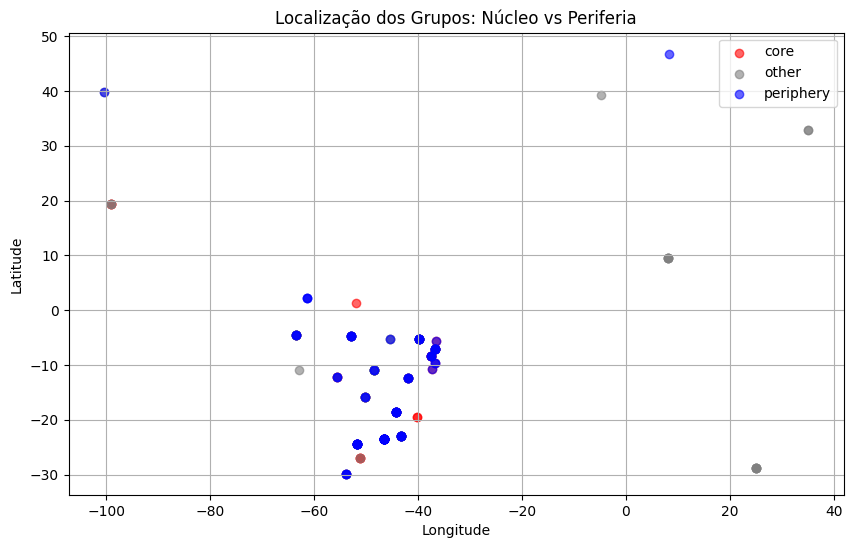

In [52]:
import matplotlib.pyplot as plt

colors = {'core': 'red', 'periphery': 'blue', 'other': 'gray'}

plt.figure(figsize=(10, 6))
for group_type, group_data in df_geo.groupby('group_type'):
    plt.scatter(group_data['longitude'], group_data['latitude'],
                label=group_type, alpha=0.6, color=colors.get(group_type, 'gray'))

plt.title("Localização dos Grupos: Núcleo vs Periferia")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.grid(True)
plt.show()


In [53]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster

# Carregar o CSV com as localizações e classificação dos grupos
df_geo = pd.read_csv("grupos_geolocalizados_core_periferia.csv")

# Remover valores nulos de latitude/longitude
df_geo = df_geo.dropna(subset=['latitude', 'longitude'])

# Criar mapa centrado no Brasil
mapa = folium.Map(location=[-14.2350, -51.9253], zoom_start=4)

# Criar clusters de marcadores
marker_cluster = MarkerCluster().add_to(mapa)

# Cores por tipo
cores = {
    'core': 'red',
    'periphery': 'blue',
    'other': 'gray'
}

# Adicionar marcadores
for _, row in df_geo.iterrows():
    folium.CircleMarker(
        location=(row['latitude'], row['longitude']),
        radius=5,
        color=cores.get(row['group_type'], 'gray'),
        fill=True,
        fill_opacity=0.7,
        popup=f"Grupo: {row['id_group_anonymous']}<br>Estado: {row['state']}<br>Tipo: {row['group_type']}"
    ).add_to(marker_cluster)

# Salvar como HTML
mapa.save("mapa_grupos_core_periferia.html")


In [54]:
import pandas as pd
import geopandas as gpd
import folium

# Carregar dados de grupo + estado + tipo
df = pd.read_csv("grupos_geolocalizados_core_periferia.csv")

# Agregação por estado e tipo
estado_tipo = df.groupby(['state', 'group_type']).size().unstack(fill_value=0).reset_index()

# Carregar shapefile dos estados brasileiros (IBGE, por exemplo)
# Exemplo usando um shapefile do Brasil (UFs)
br_states = gpd.read_file("https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson")

# Padronizar nomes de estado se necessário
estado_tipo['state'] = estado_tipo['state'].str.upper()
br_states['name'] = br_states['name'].str.upper()

# Juntar shapefile com dados
br_states = br_states.merge(estado_tipo, how='left', left_on='name', right_on='state')
br_states.fillna(0, inplace=True)

br_states = br_states.drop(columns=[col for col in br_states.columns if pd.api.types.is_datetime64_any_dtype(br_states[col])])

# Criar mapa
m = folium.Map(location=[-14.2, -51.9], zoom_start=4)

# Adicionar camada de coroplético (core)
folium.Choropleth(
    geo_data=br_states,
    data=br_states,
    columns=["name", "core"],
    key_on="feature.properties.name",
    fill_color="YlOrRd",
    legend_name="Número de Grupos no Núcleo",
    name="Núcleo"
).add_to(m)

# Adicionar camada de coroplético (periferia)
folium.Choropleth(
    geo_data=br_states,
    data=br_states,
    columns=["name", "periphery"],
    key_on="feature.properties.name",
    fill_color="YlGnBu",
    legend_name="Número de Grupos na Periferia",
    name="Periferia"
).add_to(m)

# Controle de camadas
folium.LayerControl().add_to(m)

# Salvar
m.save("mapa_estados_core_periferia.html")


/tmp/ipykernel_104469/3286932261.py:21: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  br_states.fillna(0, inplace=True)


In [56]:
from folium.plugins import HeatMap
import folium

# Carregar e filtrar dados
df = pd.read_csv("grupos_geolocalizados_core_periferia.csv")
core_data = df[df['group_type'] == 'core'].dropna(subset=['latitude', 'longitude'])

# Converter para lista de coordenadas
core_coords = core_data[['latitude', 'longitude']].values.tolist()

# Criar mapa e adicionar heatmap
m = folium.Map(location=[-14.2, -51.9], zoom_start=4)
HeatMap(core_coords, radius=15, blur=10, min_opacity=0.5).add_to(m)

# Salvar
m.save("heatmap_grupos_core.html")


In [57]:
from folium.plugins import MarkerCluster

# Criar mapa base
m = folium.Map(location=[-14.2, -51.9], zoom_start=4)

# Clusters separados por tipo
for tipo, cor in {'core': 'red', 'periphery': 'blue', 'other': 'gray'}.items():
    sub_df = df_geo[df_geo['group_type'] == tipo]
    cluster = MarkerCluster(name=f"Grupos {tipo}").add_to(m)
    
    for _, row in sub_df.iterrows():
        folium.CircleMarker(
            location=(row['latitude'], row['longitude']),
            radius=5,
            color=cor,
            fill=True,
            fill_opacity=0.7,
            popup=f"Grupo: {row['id_group_anonymous']}<br>Estado: {row['state']}<br>Tipo: {tipo}"
        ).add_to(cluster)

# Controle de camadas
folium.LayerControl().add_to(m)
m.save("mapa_separado_por_tipo.html")


In [58]:
centralities_df = pd.read_csv("centralities.csv")

# Top 10 por diferentes métricas
top_degree = centralities_df.sort_values("degree", ascending=False).head(10)
top_betweenness = centralities_df.sort_values("betweenness", ascending=False).head(10)
top_eigen = centralities_df.sort_values("eigen", ascending=False).head(10)


In [59]:
df = pd.read_csv("2p_mensagens_preprocessadas.csv")

# Supondo que você pegou top_groups a partir do top_degree
top_groups = top_degree["node"].tolist()

mensagens_top = df[df["id_group_anonymous"].isin(top_groups)].copy()


/tmp/ipykernel_104469/344866301.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("2p_mensagens_preprocessadas.csv")


In [60]:
# Agrupar textos
mensagens_freq = mensagens_top.groupby("clean_text").size().reset_index(name="count")
mensagens_freq = mensagens_freq.sort_values("count", ascending=False)

# Extrair links
import re
pattern_link = r"(chat\.whatsapp\.com/[A-Za-z0-9]+)"
mensagens_top["links"] = mensagens_top["clean_text"].str.extract(pattern_link)
links_freq = mensagens_top["links"].value_counts().reset_index()
links_freq.columns = ["link", "count"]


In [61]:
from textblob import TextBlob  # ou outro modelo mais robusto

def get_polarity(text):
    try:
        return TextBlob(text).sentiment.polarity
    except:
        return 0

mensagens_top["polaridade"] = mensagens_top["clean_text"].apply(get_polarity)


In [63]:
import pandas as pd
import re
from textblob import TextBlob

# 1. Carregar os dados
df = pd.read_csv("2p_mensagens_preprocessadas.csv")
centralities = pd.read_csv("centralities.csv")

# 2. Selecionar os 10 grupos mais influentes por degree centrality
top_groups = centralities.sort_values("degree", ascending=False).head(10)["node"].tolist()

# 3. Filtrar mensagens desses grupos e fazer uma cópia
mensagens_top = df[df["id_group_anonymous"].isin(top_groups)].copy()

# 4. Extrair links de convite do WhatsApp
pattern_link = r"(chat\.whatsapp\.com/[A-Za-z0-9]+)"
mensagens_top["links"] = mensagens_top["clean_text"].str.extract(pattern_link)

# 5. Calcular polaridade com TextBlob
def get_polarity(text):
    try:
        return TextBlob(str(text)).sentiment.polarity
    except:
        return 0

mensagens_top["polaridade"] = mensagens_top["clean_text"].apply(get_polarity)

# 6. Agrupar mensagens mais replicadas
mensagens_freq = mensagens_top.groupby("clean_text").agg(
    count=("clean_text", "size"),
    media_polaridade=("polaridade", "mean")
).reset_index().sort_values("count", ascending=False)

# 7. Agrupar links mais compartilhados
links_freq = mensagens_top["links"].value_counts().reset_index()
links_freq.columns = ["link", "count"]

# 8. Exibir resultados
print("\n📌 Top 15 mensagens mais replicadas pelos grupos mais influentes:\n")
print(mensagens_freq.head(15).to_string(index=False))

print("\n🔗 Top 15 links mais compartilhados pelos grupos mais influentes:\n")
print(links_freq.head(15).to_string(index=False))


/tmp/ipykernel_104469/1927976196.py:6: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("2p_mensagens_preprocessadas.csv")



📌 Top 15 mensagens mais replicadas pelos grupos mais influentes:

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    clean_text  count

/home/nanda/.pyenv/versions/3.10.2/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127744 (\N{CYCLONE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


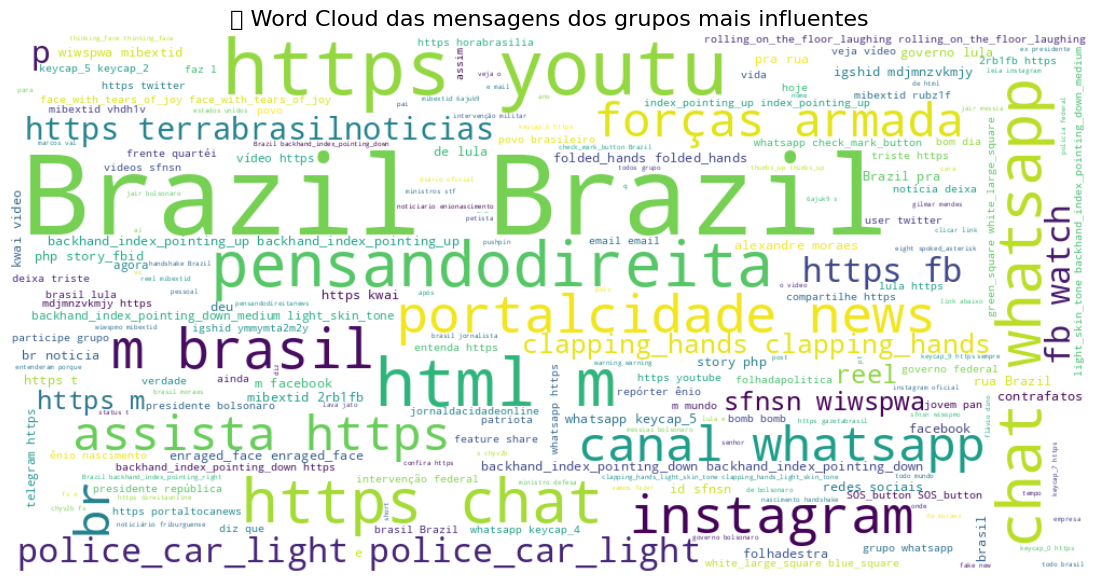

In [64]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 1. Concatenar todos os textos das mensagens desses grupos
texto_completo = " ".join(str(msg) for msg in mensagens_top["clean_text"].dropna())

# 2. Criar e configurar a Word Cloud
wordcloud = WordCloud(
    width=1000,
    height=500,
    background_color='white',
    max_words=200,
    colormap='viridis'  # outras opções: 'plasma', 'inferno', 'cool', 'twilight'
).generate(texto_completo)

# 3. Exibir
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("🌀 Word Cloud das mensagens dos grupos mais influentes", fontsize=16)
plt.show()
